In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use('ggplot')




In [3]:
iris_data = pd.read_csv('iris-data.csv', header=None)
iris_labels = pd.read_csv('iris-labels.csv', header=None)

iris_data_shape = iris_data.shape
print(iris_data_shape)

max_value = max(iris_data.max())
print(max_value)

df = iris_data.copy(deep=True) / max_value
# three classes
print(iris_labels[0].unique())

(150, 4)
7.9
[0. 1. 2.]


In [7]:




class SOM:
    
    def __init__(self):
        self.M = 40
        self.W = np.random.rand(self.M, self.M, 4)
        self.W_init = np.copy(self.W)
        self.eta = 0.1
        self.eta_0 = 0.1
        self.s = 10
        self.s0 = 10
        self.deta = 0.01
        self.ds = 0.05
        self.p = 150
    
    
    def h(self,i0):
        output = np.zeros((self.M, self.M))
        cc = 0
        for i in range(self.M):
            for j in range(self.M):
                cc += 1
                diff_i0 = np.asarray([i,j]) - i0
                dist_ij = np.linalg.norm(diff_i0)
                scale = -1/(2 * self.s**2)
                o = np.exp(scale * dist_ij**2)
                output[i,j] = o
        
        return output
    
    
    def train(self, tdf :pd.DataFrame, num_epochs=1):
        # train for num_epochs epochs
        # in each epoch perform p stochastic updates
        # each stochastic update consists of
            # pick pattern
            # find winning neuron
            # compute dwi = eta * h(i,i0) * (pattern -wi)
            # update W
        # After epoch update eta and sigma
        for e in tqdm(range(num_epochs)):
            
            for _ in range(round(self.p)):
                idx = np.random.randint(self.p)
                pattern = tdf.iloc[idx]
                r = np.zeros((self.M, self.M))
                
                for i in range(self.M):
                    for j in range(self.M):
                        r_ij = self.W[i,j,:] - pattern
                        r[i,j] = np.linalg.norm(r_ij)
                i0 = np.unravel_index(np.argmin(r, axis=None), r.shape)
                # print(i0)
                
                h_i0 = self.h(i0)
                cheat_matrix = np.full(self.W.shape, pattern)
                diff = cheat_matrix - self.W
                h_cheat = np.ones(self.W.shape)
                for i in range(self.M):
                    for j in range(self.M):
                        h_cheat[i,j,:] = h_i0[i,j]
                dw = self.eta * h_cheat * diff[:,:]
                self.W += dw
            
            # perform updates of eta and sigma
            self.eta = self.eta_0 * np.exp(-(e+1) * self.deta)
            self.s = self.s0 * np.exp(-(e+1) * self.ds)
    
    def cluster(self, tdf : pd.DataFrame, labels : pd.DataFrame, trained=False):
        
        if trained:
            wc = self.W
        else:
            wc = self.W_init
        
        plot_dict = {0: [], 1: [], 2: []}
        
        
        for i in tqdm(range(self.p)):
            l = int(labels.iloc[i])
            pattern = tdf.iloc[i]
            
            # winning neuron
            r = np.zeros((self.M, self.M))
            
            for i in range(self.M):
                for j in range(self.M):
                    r_ij = wc[i,j,:] - pattern
                    r[i,j] = np.linalg.norm(r_ij)
            i0 = np.unravel_index(np.argmin(r, axis=None), r.shape)
            plot_dict[l].append(i0)
            
            # print(plot_dict)
        
        return plot_dict
        
        

In [8]:
som = SOM()
som.train(df, num_epochs=10)
plot_dict = som.cluster(df, iris_labels, True)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:21<00:00,  6.83it/s]


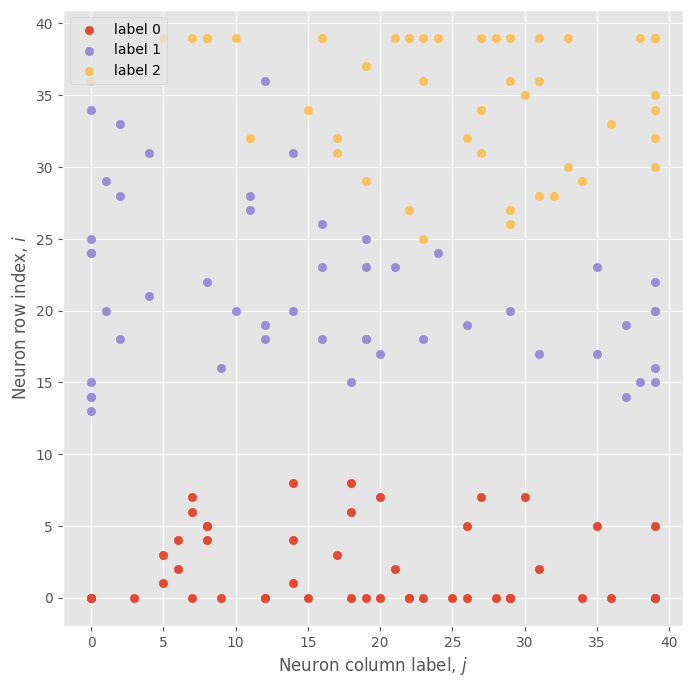

In [11]:
colors = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

f = plt.figure(figsize=(8,8))
for i in range(3):
    x,y = zip(*plot_dict[i])
    plt.scatter(x, y, color=colors[2*i])
plt.grid(True, 'both', 'both')
plt.legend(['label 0', 'label 1', 'label 2'])
plt.ylabel('Neuron row index, $i$')
plt.xlabel('Neuron column label, $j$')
plt.show()





In [4]:
tester = df.copy(deep=True)
tester['label'] = iris_labels[0]
tester.head()

,0,1,2,3,label
0,0.645570,0.443038,0.177215,0.025316,0.0
1,0.620253,0.379747,0.177215,0.025316,0.0
2,0.594937,0.405063,0.164557,0.025316,0.0
3,0.582278,0.392405,0.189873,0.025316,0.0
4,0.632911,0.455696,0.177215,0.025316,0.0


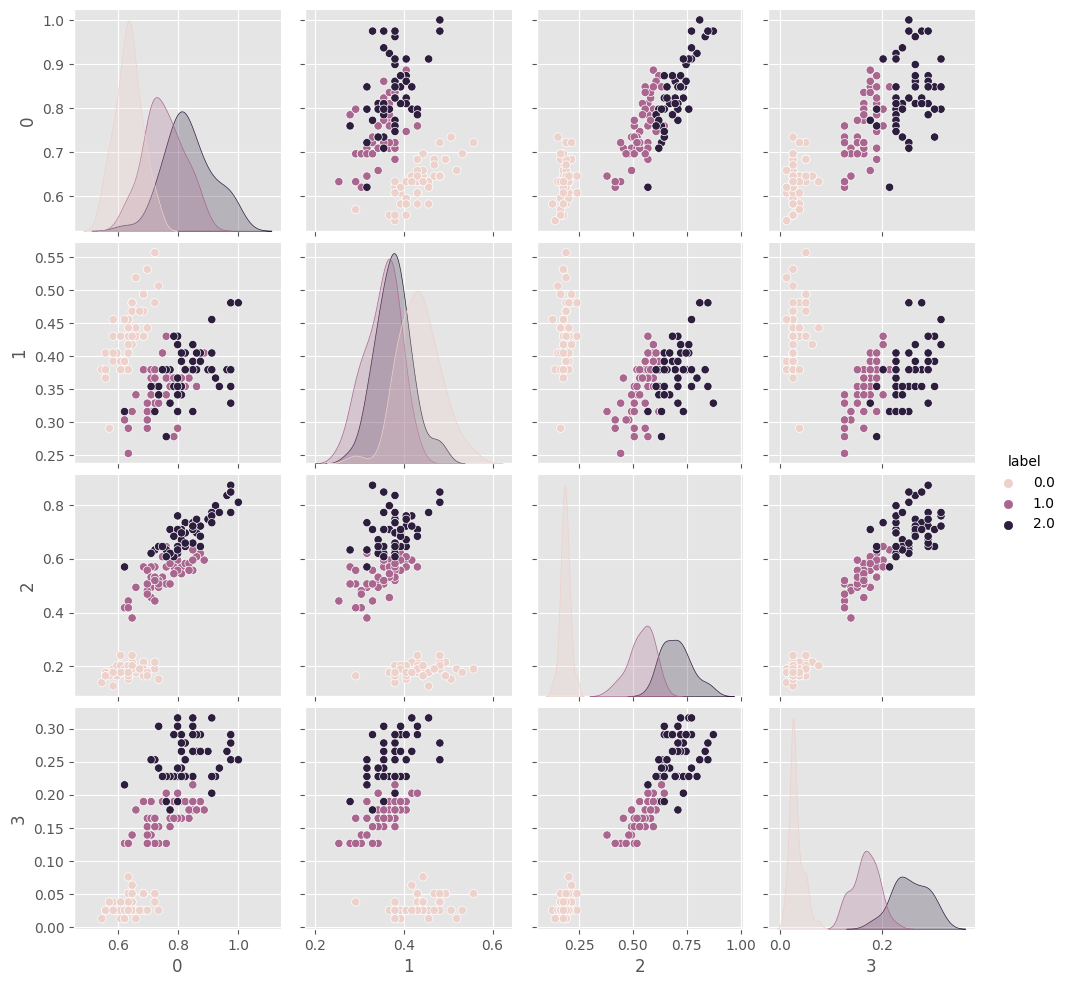

In [6]:


import seaborn as sns
sns.pairplot(tester, hue='label')